# Randomized Greedy Algorithm

Reference paper: Michael Ovelgonne and Andreas Geyer-Schulz, *Cluster Cores and Modularity Maximization*, IEEE International Conference on Data Mining Workshops, 2010

Let $G = (V, E)$ be an undirected, loop-free graph and $C = \{C_1, . . . , C_p\}$ a non-overlapping clustering, i.e. a clustering of the vertices of the graph into groups $C_i$ so that $\forall i, j : i \neq j \implies C_i \cap C_j = \emptyset$ and $\cup_i C_i = V$. We denote the adjacency matrix of $G$ as $M$ and the element of $M$ in the
$i$-th row and $j$-th column as $m_{ij}$ , where $m_{ij} = m_{ji} = 1$ if $(v_i, v_j) \in E$ and otherwise $m_{ij} = m_{ji} = 0$. The modularity $Q$ of the clustering $C$ is

$$Q = \sum_i (e_{ii} - a_i^2)$$
with
$$e_{ij} = \frac{\sum_{v_x \in C_i}\sum_{v_y \in C_j} m_{xy}}{\sum_{v_x \in V}\sum_{v_y \in V} m_{xy}}$$
and
$$a_i = \sum_j e_{ij}.$$

Objective: Find clastering $C$ such that modularity $Q$ is maximized.

In [3]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

### Loading instances

In [4]:
def load_graph(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        tokens = lines[0].split()
        n, m = int(tokens[0]), int(tokens[1])
                        
        G = nx.Graph()
    
        nodes = np.arange(1, n + 1)
        G.add_nodes_from(nodes)
        
        for i in range(1, n + 1):
            neighbours = map(int, lines[i].split())
            for j in neighbours:
                G.add_edge(i, j)
                
        return G

In [5]:
file_paths = ['Instances/karate.graph', 'Instances/football.graph', 'Instances/netscience.graph', 'Instances/PGPgiantcompo.graph']
graphs = []

for file_path in file_paths:
        graphs.append(load_graph(file_path))

### Modularity function

In [6]:
def number_of_connecting_edges(G, C, i, j):
    res = 0
    for u in C[i]:
        for v in C[j]:
            if G.has_edge(u, v):
                res += 1
    return res

def number_of_claster_edges(G, C, i):
    res = 0
    number_of_clasters = len(C)
    
    #for j in range(1, number_of_clasters + 1):
    #    res += number_of_connecting_edges(G, C, i, j)
    
    for j in C:
        res += number_of_connecting_edges(G, C, i, j)
    
    return res

def fraction_of_connecting_edges(G, C, i, j):
    return number_of_connecting_edges(G, C, i, j) / G.number_of_edges()
        
def fraction_of_claster_edges(G, C, i):
    return number_of_claster_edges(G, C, i) / G.number_of_edges()

def modularity(G, C):
    res = 0.0
    number_of_clasters = len(C)
    
    #for i in range(1, number_of_clasters + 1):
    #    res += (fraction_of_connecting_edges(G, C, i, i) - fraction_of_claster_edges(G, C, i))**2
    
    for i in C:
        res += (fraction_of_connecting_edges(G, C, i, i) - fraction_of_claster_edges(G, C, i))**2
    
    return res

In [7]:
G = graphs[0]

C = {node: [node] for node in G.nodes()}

modularity(G, C)

0.19921104536489145

# Plain Greedy (PG) algorithm

In [8]:
def has_connecting_edge(G, C, i, j):
    if (i not in C.keys()) or (j not in C.keys()):
        print('The key you are looking for is removed from the dictionary while merging some clusters!')
        return None
    
    for v in C[i]:
        for u in C[j]:
            if G.has_edge(u, v):
                return True
    return False

def join_for_plain_greedy(G, C, i, j):
    tmp=C[j]
    C[i]+=tmp
    C.pop(j)
    
def join(G, C, joins):
    for i, j in joins:
        join_for_plain_greedy(G, C, i, j)
        #tmp=C[pair[1]]
        #C[pair[0]]+=tmp
        #C.pop(pair[1])

C = {node: [node] for node in G.nodes()}
#join1(G, C, 1, 2)
print(C)
#join1(G,C, 3, 16)
print(C)

{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34]}
{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34]}


In [11]:
# Initialising clasters
C = {node: [node] for node in G.nodes()}
print(C)
print('----------------------------------------------------------')
joins = []
modularity_values=[]
n=len(C)-1
for _ in range(n):
    next_join = (0, 0)
    max_delta_Q = -float('inf')
    modularity_values.append(modularity(G,C))
    for i in C:
        for j in C:
            if i >= j or (i, j) in joins:
                continue
            if not has_connecting_edge(G, C, i, j):
                continue
            delta_Q = 2 * (fraction_of_connecting_edges(G, C, i, j) - fraction_of_claster_edges(G, C, i) * fraction_of_claster_edges(G, C, j))
            if max_delta_Q < delta_Q:
                max_delta_Q = delta_Q
                next_join = (i, j)
                #join(G, C, i, j)
    joins.append(next_join)
    if next_join==(0,0):
        break
    join_for_plain_greedy(G, C, next_join[0], next_join[1])

#join(G, C, joins)
print(C)

{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34]}
----------------------------------------------------------
{1: [1, 12, 5, 11, 6, 17, 7, 2, 18, 22, 20, 9, 31, 3, 10, 29, 4, 13, 8, 14, 15, 33, 16, 19, 21, 23, 27, 30, 34, 24, 28, 25, 26, 32]}


In [12]:
modularity(G, C)

0.0

1
[0.19921104536489145, 0.1985535831689677, 0.19592373438527277, 0.19526627218934905, 0.1949375410913872, 0.19230769230769226, 0.1919789612097304, 0.18934911242603547, 0.18869165023011172, 0.18343195266272186, 0.18277449046679814, 0.18211702827087442, 0.1834319526627219, 0.18474687705456935, 0.1840894148586456, 0.18343195266272191, 0.18080210387902698, 0.18014464168310323, 0.1794871794871795, 0.1814595660749507, 0.18080210387902698, 0.18014464168310323, 0.18211702827087442, 0.1623931623931624, 0.16403681788297175, 0.16337935568704803, 0.12919132149901377, 0.13445101906640364, 0.13675213675213668, 0.14924391847468768, 0.1426692965154503, 0.11604207758053908, 0.04733727810650885]


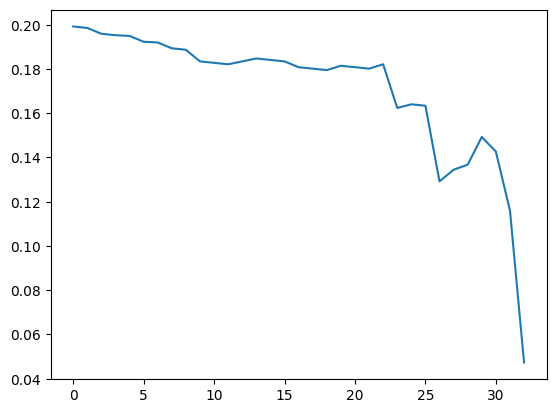

In [13]:
l=[1,2,3]
print(l[0])
print(modularity_values)
plt.plot(modularity_values)
plt.show()

In [14]:
#G.nodes()
#list(G.neighbors(5))
e=[]
a=[]
for node in G.nodes():
    e.append([])
    for neighbor in list(G.neighbors(node)):
        e[node-1].append(1/(2*len(G.edges())))
    sum=0
    for x in range(len(e[node-1])):
        sum+=x
    a.append(x)
print(a)    

[15, 8, 9, 5, 2, 3, 3, 3, 4, 1, 2, 0, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 2, 1, 3, 2, 3, 3, 5, 11, 16]


# Randomized Greedy (RG)

In [15]:
import sys
import copy
import numpy as np
import random
random.seed(7)

In [16]:
# Initialising our graph!
G = graphs[0]

C = {node: [node] for node in G.nodes()}

print(modularity(G, C))

0.19921104536489145


In [17]:
print('-------------------------------------------------------------------------')
print(C)
print('-------------------------------------------------------------------------')
for i in C:
    print(i, end=' ')
print('-------------------------------------------------------------------------')
for i in C.keys():
    print(i, end=' ')

-------------------------------------------------------------------------
{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34]}
-------------------------------------------------------------------------
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 -------------------------------------------------------------------------
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 

In [18]:
def join_for_randomized_greedy(G, C, i, j):
    tmp=C[j]
    C[i]+=tmp
    C.pop(j)

In [19]:
# This function should pick k different clusters within the graph we are working with 
# and return the list of indeces of chosen clusters!
def pick_k_random_clusters(G, C, k):
    set_indexes=set()
    result=[]
    count = 0
    n=len(C.keys())
    if k>n:
        print('There are not that many clusters in our graph!')
        return None
    while count < k:
        p=random.randint(0, n)
        if p not in set_indexes:
            set_indexes.add(p)
            count+=1
            result.append(p)
            
    result.sort()
    
    return result  

def pick_random_cluster(G, C):
    help=list(C.keys())
    n=len(C.keys())
    return help[random.randint(0, n-1)]

In [20]:
# Here we just wanted to check the pick_k_random_clusters funtion!
k_clusters=pick_k_random_clusters(G, C, 6)
print(k_clusters)

[3, 4, 9, 20, 25, 34]


In [21]:
# Initialising clasters
C = {node: [node] for node in G.nodes()}
print(C)
print('----------------------------------------------------------')
joins = []
modularity_values=[]
clusters_list=[]
deleted=[]
count=1
n=len(C)
for p in range(n-1):
    next_join = (0, 0)
    max_delta_Q = -float('inf')
    if p < n//2:
        k=1
    else:
        k=2
    #random_k_clusters=pick_k_random_clusters(G, C, k)    
    modularity_values.append(modularity(G, C))
    clusters_list.append(copy.deepcopy(C))
    print('Iteration number: ', str(count))
    print('k = ', str(k))
    #for i in random_k_clusters:
    for _ in range(k):
        i=pick_random_cluster(G, C)
        for j in C.keys():
            if i==j:
                continue
                
            if not has_connecting_edge(G, C, i, j):
                continue
                
            #print(str(i)+ ' ' +str(j))
            
            delta_Q = 2 * (fraction_of_connecting_edges(G, C, i, j) - fraction_of_claster_edges(G, C, i) * fraction_of_claster_edges(G, C, j))
            if max_delta_Q < delta_Q:
                max_delta_Q = delta_Q
                next_join = (i, j)
    joins.append(next_join)
    if next_join==(0,0):
        continue
    join_for_randomized_greedy(G, C, next_join[0], next_join[1])
    count+=1

#join(G, C, joins)
print(C)

{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34]}
----------------------------------------------------------
Iteration number:  1
k =  1
Iteration number:  2
k =  1
Iteration number:  3
k =  1
Iteration number:  4
k =  1
Iteration number:  5
k =  1
Iteration number:  6
k =  1
Iteration number:  7
k =  1
Iteration number:  8
k =  1
Iteration number:  9
k =  1
Iteration number:  10
k =  1
Iteration number:  11
k =  1
Iteration number:  12
k =  1
Iteration number:  13
k =  1
Iteration number:  14
k =  1
Iteration number:  15
k =  1
Iteration number:  16
k =  1
Iteration number:  17
k =  1
Iteration number:  18
k =  2
Iteration number:  19
k =  2
Iteration number:  20
k =  2
Iteration number:  21
k =  2
Iteration number: 

In [22]:
modularity(G, C)

0.0

In [44]:
def RG(G, C):
    joins = []
    modularity_values=[]
    clusters_list=[]
    deleted=[]
    count=1
    n=len(C)
    for p in range(n-1):
        next_join = (0, 0)
        max_delta_Q = -float('inf')
        if p < n//2:
            k=1
        else:
            k=2
        #random_k_clusters=pick_k_random_clusters(G, C, k)    
        modularity_values.append(modularity(G, C))
        clusters_list.append(copy.deepcopy(C))
        for _ in range(k):
            i=pick_random_cluster(G, C)
            for j in C.keys():
                if i==j:
                    continue

                if not has_connecting_edge(G, C, i, j):
                    continue

                delta_Q = 2 * (fraction_of_connecting_edges(G, C, i, j) - fraction_of_claster_edges(G, C, i) * fraction_of_claster_edges(G, C, j))
                if max_delta_Q < delta_Q:
                    max_delta_Q = delta_Q
                    next_join = (i, j)
        joins.append(next_join)
        if next_join==(0,0):
            continue
        join_for_randomized_greedy(G, C, next_join[0], next_join[1])
        count+=1
    
    modularity_values=np.array(modularity_values)
    max_index=modularity_values.argmax()
    
    return clusters_list[max_index]

## Greedy refinement

In [24]:
print(max(modularity_values))
modularity_values=np.array(modularity_values)
max_index=modularity_values.argmax()
print(max_index)
print(clusters_list[max_index])

0.2028270874424721
12
{5: [5, 11, 1], 6: [6], 7: [7, 17], 8: [8, 4, 13], 9: [9], 12: [12], 14: [14, 3, 10], 18: [18], 19: [19], 20: [20, 2], 21: [21, 33, 15, 16], 22: [22], 23: [23], 24: [24], 25: [25, 26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 34: [34]}


[0.19921105 0.19855358 0.19822485 0.19756739 0.19690993 0.19855358
 0.20052597 0.19986851 0.19953978 0.19888231 0.19822485 0.195595
 0.20282709 0.20019724 0.19953978 0.19690993 0.17587114 0.17192636
 0.17324129 0.17455621 0.17324129 0.17061144 0.16995398 0.16929652
 0.16863905 0.16798159 0.13379356 0.13313609 0.13675214 0.12393162
 0.11538462 0.13247863 0.0644313 ]


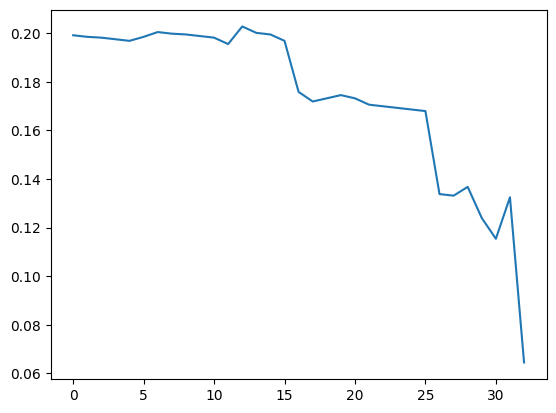

In [25]:
print(modularity_values)
plt.plot(modularity_values)
plt.show()

In [26]:
def find_coresponding_cluster(G, C, v):
    for k in C.keys():
         if v in C[k]:
                return k
    return None        
def move_delta_Q(G, C, v, cc, nc):
    Q1=modularity(G, C)
    #print('move_delta_Q function!')
    #print(v)
    #print(C[cc])
    #print(C[nc])
    CC=copy.deepcopy(C)
    CC[cc].remove(v)
    CC[nc].append(v)
    #print(CC[cc])
    #print(CC[nc])
    Q2=modularity(G, CC)
    return Q2-Q1

def neighbor_clusters(G, C, v, cc):            
    result=[]
    for k in C.keys():
        if k==cc:
            continue
        for x in C[k]:
            if (x, v) in G.edges() or (v, x) in G.edges():
                result.append(k)
    return result   
def move(G, C, v, cc, nc):
    #print('move function!')
    #print(v)
    #print(C[cc])
    #print(C[nc])
    #print('Little pause:')
    C[cc].remove(v)
    C[nc].append(v)
    #print(C[cc])
    #print(C[nc])

In [27]:
print(G.edges())
print(max(modularity_values))
C=clusters_list[max_index]
print('----------------------------------------------------------')
print(C)
print('Number of nodes in graph G is equal to: ', len(G.nodes()))

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33), (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 33), (9, 34), (10, 34), (14, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (20, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 28), (24, 30), (24, 33), (24, 34), (25, 26), (25, 28), (25, 32), (26, 32), (27, 30), (27, 34), (28, 34), (29, 32), (29, 34), (30, 33), (30, 34), (31, 33), (31, 34), (32, 33), (32, 34), (33, 34)]
0.2028270874424721
----------------------------------------------------------
{5: [5, 11, 1], 6: [6], 7: [7, 17], 8: [8, 4, 13], 9: [9], 12: [12], 14: [14, 3, 10], 18: [18], 19: [19], 20: [20, 2], 21: [21, 33, 15, 16], 22: [22], 23: [23], 24: [24], 25: [25, 26], 27: [27], 28: [28

In [28]:
change=True
count=1
previous=None
while change:
    print('Iteration number: ', count)
    #print(C)
    change=False
    for v in G.nodes():
        current_cluster=find_coresponding_cluster(G, C, v)
        best_delta_Q=0
        star_cluster=None
        for neighbor_cluster in neighbor_clusters(G, C, v, current_cluster):
            delta_Q=move_delta_Q(G, C, v, current_cluster, neighbor_cluster)
            if delta_Q > best_delta_Q:
                best_delta_Q=delta_Q
                star_cluster=neighbor_cluster
        if best_delta_Q > 0:
            previous=C
            print('Here!')
            move(G, C, v, current_cluster, star_cluster)
            change=True
    count+=1        
print(C) 
print(modularity(G, C))

Iteration number:  1
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Iteration number:  2
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Iteration number:  3
Here!
Here!
Here!
Here!
Here!
Here!
Here!
Iteration number:  4
Here!
Here!
Iteration number:  5
{5: [], 6: [], 7: [17], 8: [13], 9: [], 12: [12], 14: [10, 2, 5, 6, 33, 34, 25, 1, 24, 29, 4], 18: [18], 19: [19], 20: [], 21: [21, 15, 16, 3, 26, 31, 7, 11, 20, 30, 32, 9, 14, 28, 8], 22: [22], 23: [23], 24: [], 25: [], 27: [27], 28: [], 29: [], 30: [], 31: [], 32: [], 34: []}
0.9911242603550297


# Optimized randomized greedy algorithm (RG+ algorithm) 

In [29]:
import math

In [30]:
# Initialising our graph!
G = graphs[0]

C = {node: [node] for node in G.nodes()}

print(modularity(G, C))
print(C)

0.19921104536489145
{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34]}


In [31]:
# The first part of the Fast Randomized Greedy algorithm!
z=int(math.log(len(G.nodes())))
print(str(z))
optimal_clusterings=[]
#modularity_values, clustering_list=RG(G, C)
#modularity_values=np.array(modularity_values)
#used_modularity_values=set()
for i in range(z):
    C = {node: [node] for node in G.nodes()}
    optimal_clusterings.append(RG(G,C))
print(optimal_clusterings) 
print(len(optimal_clusterings))

3
[{1: [1], 2: [2], 6: [6], 7: [7], 8: [8, 4], 10: [10, 3], 11: [11, 5], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25, 26], 28: [28], 29: [29, 32], 30: [30, 27], 31: [31, 9, 33], 34: [34]}, {1: [1], 2: [2, 18, 22], 5: [5, 11], 6: [6], 7: [7, 17], 8: [8, 13, 4], 9: [9], 12: [12], 14: [14, 3], 15: [15], 19: [19], 20: [20], 21: [21, 16, 23, 33], 24: [24], 25: [25, 26, 32], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 34: [34, 10]}, {1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9, 31], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21, 33], 22: [22], 23: [23], 24: [24, 26], 25: [25], 27: [27], 28: [28], 29: [29], 30: [30], 32: [32], 34: [34]}]
3


In [32]:
# This is the function that would be used in the second part of 
# the Fast Randomized Greedy algorithm implementation!
def merge_clusterings(core_clustering, current_clustering):
    new_core_clustering={}
    result_clusters=[]          
                
    # This way we will identify core clusters!
    for k1 in core_clustering.keys():
        for k2 in current_clustering.keys():
            if len(core_clustering[k1])==0:
                break
                
            tmp_set=set()
            while x in core_clustering[k1] and x in current_clustering[k2]:
                tmp_set.add(x)
                core_clustering[k1].remove(x)
                current_clustering[k2].remove(x)
            
            if(len(tmp_set))!=0:
                result_clusters.append(list(tmp_set))
            
            if len(core_clustering[k1])==0:
                break
    
    # Everything else that is still in the one dictionary or the other 
    # should be added to result_clusters list            
    for k1 in core_clustering.keys():
        if len(core_clustering[k1])!=0:
            result_clusters.append(core_clustering[k1])
    
    # Now when we have all clusters stored in a list, we need to create a dictionary from that list!
    index=1
    for cluster in result_clusters:
        new_core_clustering[index]=cluster
        index+=1
    
    return new_core_clustering        

In [33]:
# Just to check something!
l1=[1, 2, 9, 4, 4, 4]
l2=[1, 2, 6, 7, 9]
l3=[1, 2, 4, 5]
if l1==l2:
    print('Lists are identical!')
else:
    print('Lists are not identical!')

if l1<l3:
    print('Wow, we can do that too!')

Lists are not identical!


In [34]:
# The second part of the Fast Randomized Greedy algorithm!
core_clustering=optimal_clusterings[0]
print(core_clustering)
print('--------------------------------------------------------------------')
for i in range(1, len(optimal_clusterings)):
    core_clustering=merge_clusterings(core_clustering, optimal_clusterings[i])
print(core_clustering)    

{1: [1], 2: [2], 6: [6], 7: [7], 8: [8, 4], 10: [10, 3], 11: [11, 5], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25, 26], 28: [28], 29: [29, 32], 30: [30, 27], 31: [31, 9, 33], 34: [34]}
--------------------------------------------------------------------
{1: [16], 2: [1], 3: [2], 4: [6], 5: [7], 6: [8, 4], 7: [10, 3], 8: [11, 5], 9: [12], 10: [13], 11: [14], 12: [15], 13: [17], 14: [18], 15: [19], 16: [20], 17: [21], 18: [22], 19: [23], 20: [24], 21: [25, 26], 22: [28], 23: [29, 32], 24: [30, 27], 25: [31, 9, 33], 26: [34]}


In [35]:
# Here is the modularity we get when we apply RG algorithm after we applied RG+!
# We get better results which was our intention at the first place!
X=RG(G, core_clustering)
print(X)
print(modularity(G, X))

{1: [16], 2: [1], 3: [2], 4: [6], 5: [7], 6: [8, 4], 7: [10, 3], 8: [11, 5], 9: [12], 10: [13], 11: [14], 12: [15], 13: [17], 14: [18], 15: [19], 16: [20], 17: [21], 18: [22], 19: [23], 20: [24], 21: [25, 26], 22: [28], 23: [29, 32], 24: [30, 27], 25: [31, 9, 33], 26: [34]}
0.20644312952005256


In [37]:
# Here is the modularity we receive after applying RG algorithm on initial clustering state!
# As you can see, we got lower modularity value in comparison with aboce cell!
G = graphs[0]

C = {node: [node] for node in G.nodes()}
X=RG(G, C)
print(X)
print(modularity(G, X))

{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34]}
0.19921104536489145


In [50]:
# In this cell we will sumarize whole work of RG+ algorithm!
def fast_RG(G, C):
    # The first part of the Fast Randomized Greedy algorithm!
    z=int(math.log(len(G.nodes())))
    optimal_clusterings=[]
    for i in range(z):
        C = {node: [node] for node in G.nodes()}
        optimal_clusterings.append(RG(G,C))
    
    # Some extra outputs we used to track the work of RG+ algorithm!
    #print(optimal_clusterings) 
    #print(len(optimal_clusterings))
    
    # The second part of the Fast Randomized Greedy algorithm!
    core_clustering=optimal_clusterings[0]
    for i in range(1, len(optimal_clusterings)):
        core_clustering=merge_clusterings(core_clustering, optimal_clusterings[i])
    
    #print(core_clustering) 
    core_clustering=RG(G, core_clustering)
    
    return core_clustering

# Testing results of RG and RG+ to see which one works better!

In [ ]:
print('The number of graphs we are working with is equal to: ', len(graphs))
pairs_of_results=[]
count=1
for G in graphs:
    print('----------------------------------------------------')
    print('We are processing graph number ', count, '!')
    print('This graph contains ', len(G.nodes()), ' nodes!')
    print('This graph contains ', len(G.edges()), ' edges!')
    fast_rg_points=0
    rg_points=0
    for i in range(100):
        C1={node: [node] for node in G.nodes()}
        C2={node: [node] for node in G.nodes()}
        rg_result=RG(G,C1)
        fast_rg_result=fast_RG(G, C2)
        if modularity(G, fast_rg_result)>modularity(G, rg_result):
            #print('True!', end=' ')
            fast_rg_points+=1
        else:
            #print('False!', end=' ')
            rg_points+=1    
        pairs_of_results.append((modularity(G, fast_rg_result), modularity(G, rg_result)))
    print('\tGraph number ', count, 'is processed!')
    print('Total score for RG+ algortihm: ', fast_rg_points)
    print('Total score for RG algorithm: ', rg_points)
    count+=1

print('Number of pairs we will process is equal to: ', len(pairs_of_results))        
for pair in pairs_of_results:
    if pair[0]>pair[1]:
        print('True', end=' ')
    else:
        print('False', end=' ')

The number of graphs we are working with is equal to:  4
----------------------------------------------------
We are processing graph number  1 !
This graph contains  34  nodes!
This graph contains  78  edges!
	Graph number  1 is processed!
Total score for RG+ algortihm:  62
Total score for RG algorithm:  38
----------------------------------------------------
We are processing graph number  2 !
This graph contains  115  nodes!
This graph contains  613  edges!
